In [73]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

In [74]:
df = pd.read_csv("full_raw_dataset.csv")

In [75]:
df.shape

(356251, 798)

In [76]:
features = pd.read_csv("custom_features.csv", header=0).FEATURE.to_list()

In [77]:
df = df[features]

In [78]:
df.shape

(356251, 140)

In [79]:
df = df.dropna(how="any", axis="index", subset="TARGET")

In [80]:
df.shape

(307507, 140)

In [81]:
features_to_drop = [_col for _col in df.columns if _col.count('nan')]

In [82]:
df = df.drop(columns=features_to_drop)

In [83]:
df.shape

(307507, 140)

In [84]:
df_nan = df.isna().mean().sort_values(ascending=False).to_frame().rename(columns={0:"prop_nan"})

In [85]:
df = df[df_nan.loc[df_nan.prop_nan <= 0.10,:].index]

In [86]:
df.columns[:100]

Index(['INSTAL_PAYMENT_PERC_MEAN', 'INSTAL_PAYMENT_PERC_SUM',
       'INSTAL_AMT_PAYMENT_MEAN', 'INSTAL_AMT_PAYMENT_MAX',
       'INSTAL_AMT_PAYMENT_MIN', 'INSTAL_PAYMENT_PERC_MAX', 'INSTAL_DBD_MAX',
       'INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE', 'INSTAL_DPD_MAX',
       'INSTAL_DPD_MEAN', 'INSTAL_DPD_SUM', 'INSTAL_COUNT', 'INSTAL_DBD_MEAN',
       'INSTAL_DBD_SUM', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'PAYMENT_RATE',
       'ANNUITY_INCOME_PERC', 'INCOME_PER_PERSON', 'CNT_FAM_MEMBERS',
       'ORGANIZATION_TYPE_Medicine', 'ORGANIZATION_TYPE_Insurance',
       'ORGANIZATION_TYPE_Kindergarten', 'ORGANIZATION_TYPE_Legal Services',
       'ORGANIZATION_TYPE_Police', 'ORGANIZATION_TYPE_Military',
       'ORGANIZATION_TYPE_Mobile', 'ORGANIZATION_TYPE_Other',
       'ORGANIZATION_TYPE_Industry: type 8', 'ORGANIZATION_TYPE_Postal',
       'ORGANIZATION_TYPE_Industry: type 9',
       'ORGANIZATION_TYPE_Industry: type 4',
       'ORGANIZATION_TYPE_Industry: type 7',
       'ORGANIZATION_TYPE_Indu

In [87]:
df_quanti = df[df.dtypes[df.dtypes == "float64"].index]

In [88]:
df_quanti.shape

(307507, 25)

In [89]:
df_quanti.head()

,INSTAL_PAYMENT_PERC_MEAN,INSTAL_PAYMENT_PERC_SUM,INSTAL_AMT_PAYMENT_MEAN,INSTAL_AMT_PAYMENT_MAX,INSTAL_AMT_PAYMENT_MIN,INSTAL_PAYMENT_PERC_MAX,INSTAL_DBD_MAX,INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE,INSTAL_DPD_MAX,INSTAL_DPD_MEAN,...,AMT_ANNUITY,PAYMENT_RATE,ANNUITY_INCOME_PERC,INCOME_PER_PERSON,CNT_FAM_MEMBERS,INCOME_CREDIT_PERC,TARGET,REGION_POPULATION_RELATIVE,AMT_CREDIT,AMT_INCOME_TOTAL
0,1.000000,19.0,11559.247105,53093.745,9251.775,1.0,31.0,2.0,0.0,0.000000,...,24700.5,0.060749,0.121978,202500.0,1.0,0.498036,1.0,0.018801,406597.5,202500.0
1,1.000000,25.0,64754.586000,560835.360,6662.970,1.0,14.0,2.0,0.0,0.000000,...,35698.5,0.027598,0.132217,135000.0,2.0,0.208736,0.0,0.003541,1293502.5,270000.0
2,1.000000,3.0,7096.155000,10573.965,5357.250,1.0,11.0,2.0,0.0,0.000000,...,6750.0,0.050000,0.100000,67500.0,1.0,0.500000,0.0,0.010032,135000.0,67500.0
3,1.000000,16.0,62947.088438,691786.890,2482.920,1.0,77.0,2.0,0.0,0.000000,...,29686.5,0.094941,0.219900,67500.0,2.0,0.431748,0.0,0.008019,312682.5,135000.0
4,0.954545,63.0,12214.060227,22678.785,0.180,1.0,31.0,2.0,12.0,0.954545,...,21865.5,0.042623,0.179963,121500.0,1.0,0.236842,0.0,0.028663,513000.0,121500.0


<AxesSubplot:>

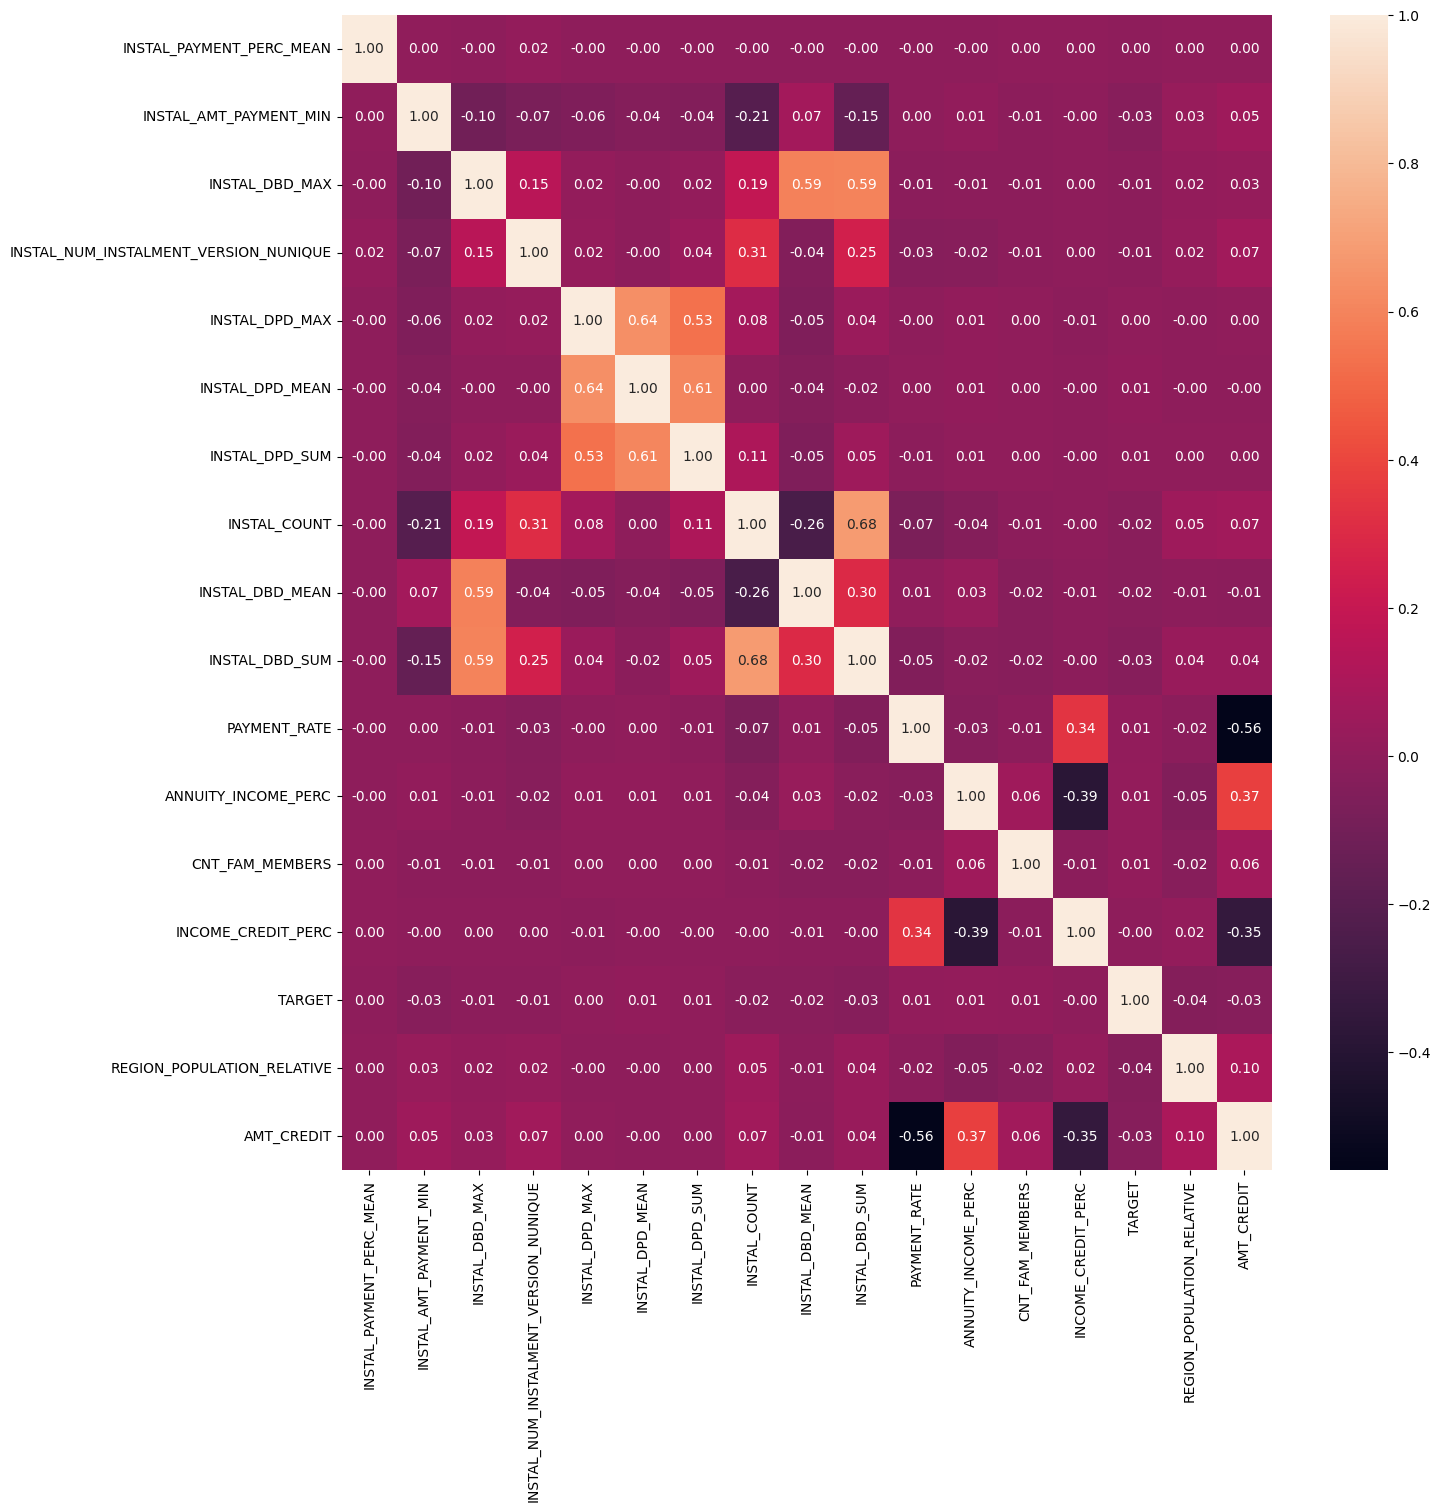

In [99]:
plt.figure(figsize=[15,15])
sns.heatmap(df_quanti.corr(), annot=True, fmt=".2f")

In [91]:
quanti_features_to_drop = ["AMT_GOODS_PRICE", "AMT_INCOME_TOTAL", "INCOME_PER_PERSON", "AMT_ANNUITY", "INSTAL_AMT_PAYMENT_MAX", "INSTAL_PAYMENT_PERC_SUM", "INSTAL_AMT_PAYMENT_MEAN", "INSTAL_PAYMENT_PERC_MAX"]

In [92]:
df_quanti = df_quanti.drop(columns=quanti_features_to_drop)

<AxesSubplot:>

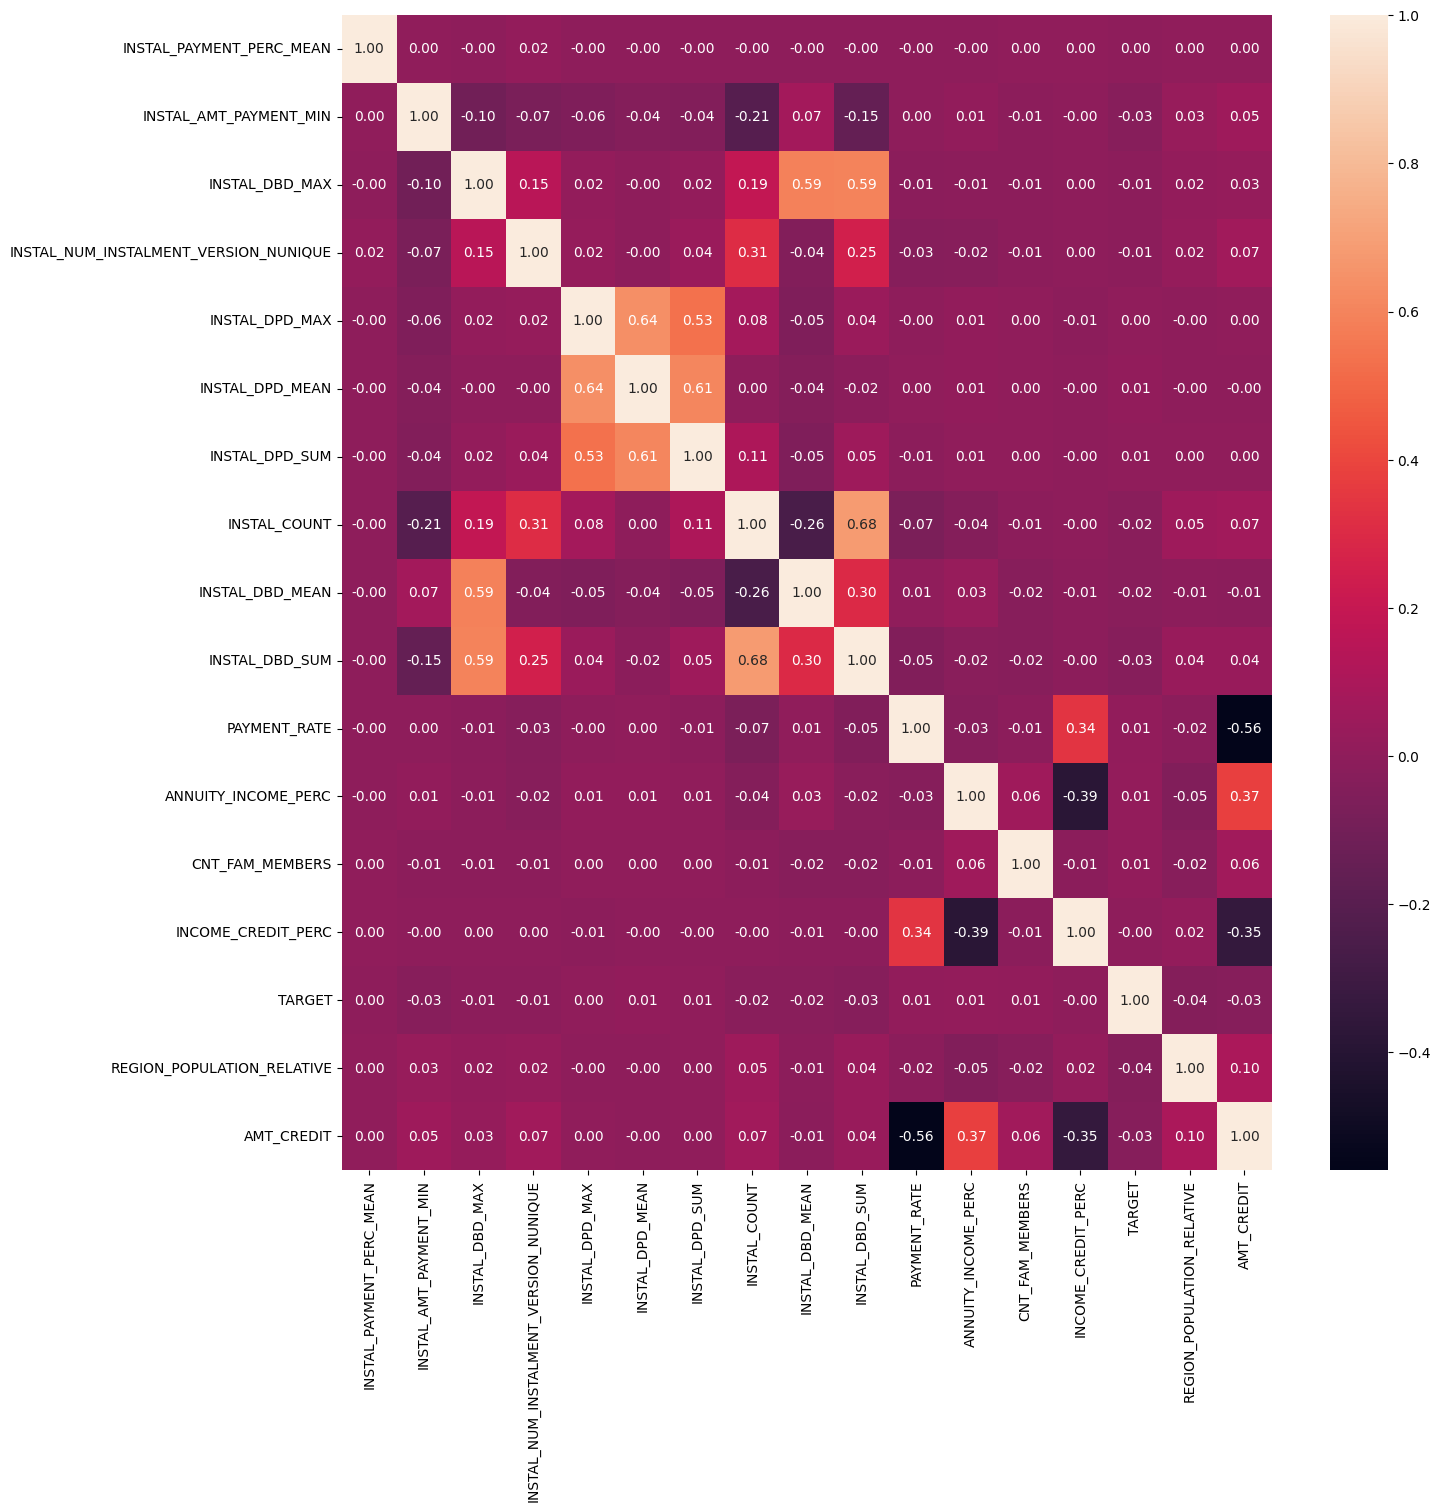

In [93]:
plt.figure(figsize=[15,15])
sns.heatmap(df_quanti.corr(), annot=True, fmt=".2f")

In [94]:
df = df.drop(columns=quanti_features_to_drop)

In [95]:
df.shape

(307507, 130)

In [96]:
df = df.dropna(how="any", axis="index")

In [97]:
df.shape

(291601, 130)

In [98]:
df.to_csv("full_clean_dataset.csv", index=False)